# **Código de prueba para Interpolación**
Tomado de: http://carina.fcaglp.unlp.edu.ar/mpp/notebooks/ajuste_tendencia_ccaSalado.html

In [2]:
import numpy as np                     # para calcular, NUMerical PYthon.
import matplotlib.pyplot as plt        # para graficar, matplotlib.

In [3]:
d = np.loadtxt('data/cca-salado.txt')
x, y, gz = d[:, 0], d[:, 1], d[:, 4]         # columnas del dato en cada vector

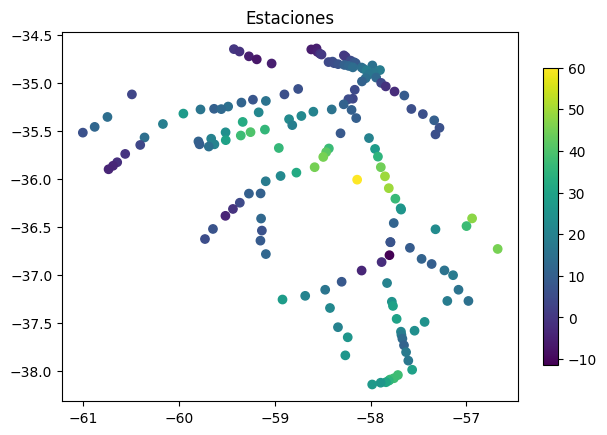

In [4]:
# Gráfico (simplificado)
plt.figure()
cax = plt.scatter(x, y, c=gz)
cbar = plt.colorbar(cax, fraction=0.03)
plt.title('Estaciones')
plt.show()


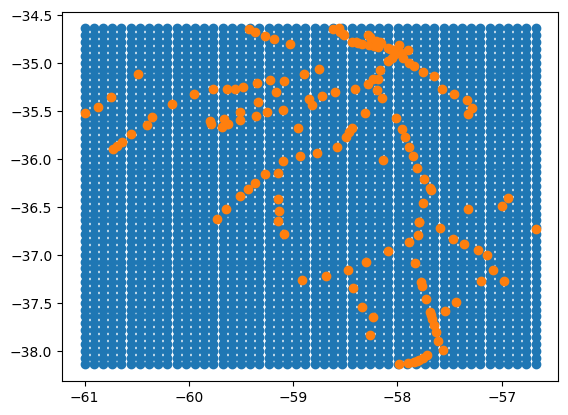

In [5]:
# Construcción de la grilla
nx, ny = 50, 50
grid_x = np.linspace(min(x), max(x), nx)
grid_y = np.linspace(min(y), max(y), ny)
X, Y = np.meshgrid(grid_x, grid_y)

# Gráfico (simplificado)
plt.figure()
plt.scatter(X, Y)
plt.scatter(x, y)
plt.show()


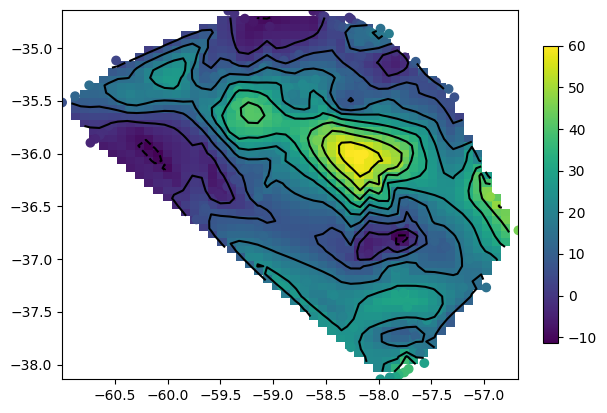

In [21]:
from scipy.interpolate import griddata

GZ = griddata(points=(x, y), values=gz, xi=(
    X, Y), method='cubic', fill_value=np.nan)
# Si se coloca np.nan en vez de 0, se ve mejor el gráfico.
# Debido a que sólo se grafican los puntos, no la grilla.

# Gráfico (simplificado)
plt.figure()
plt.contour(X, Y, GZ,10, colors='black')
plt.imshow(GZ, origin="lower", interpolation=None, extent=[
           np.min(x), np.max(x), np.min(y), np.max(y)])
cax2 = plt.scatter(x, y, c=gz)
cbar2 = plt.colorbar(cax2, fraction=0.03)
plt.show()


# Ajuste de polinomios de tendencia

In [7]:
# Caso M = 1:  m = (a,b,c)^T es 3x1
m      = np.zeros(shape=(3,1))
A      = np.zeros(shape=(len(gz),len(m)))
A[:,0] = x
A[:,1] = y
A[:,2] = np.ones(len(gz))

In [8]:
from scipy.linalg import lstsq

m,_,_,_ = lstsq(A,gz)

# Interpolación de la superficie de tendencia sobre la grilla rectangular

In [9]:
nx = len(grid_x)
ny = len(grid_y)
A_grid = np.zeros(shape=(nx*ny, len(m)))
# Caso M = 1
A_grid[:, 0] = X.reshape(nx*ny)
A_grid[:, 1] = Y.reshape(nx*ny)
A_grid[:, 2] = np.ones(nx*ny)

In [10]:
GZ_fit = A_grid @ m # En Python>3, '@' es el producto entre una matriz y un vector
GZ_res = GZ - GZ_fit.reshape(nx,ny) # campo residual interpolado

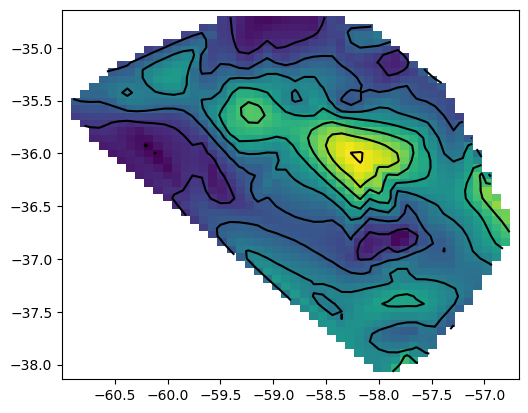

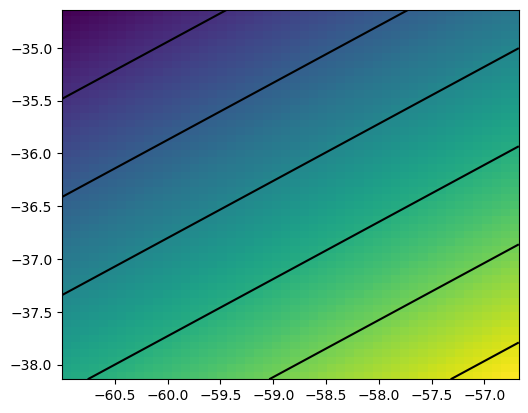

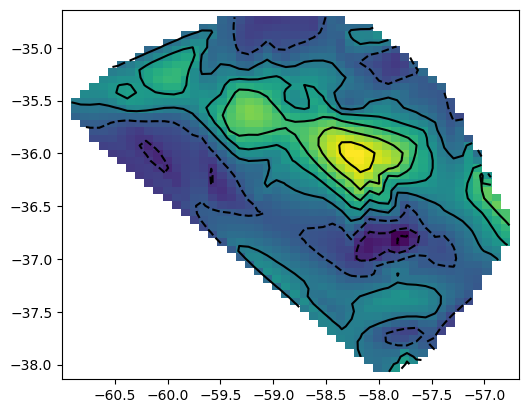

In [11]:
# Gráficos (simplificado):
for GRILLA in [GZ, GZ_fit.reshape(nx,ny), GZ_res]:
    plt.figure()
    plt.contour(X, Y, GRILLA, colors="black")
    plt.imshow(GRILLA, origin="lower", interpolation=None, extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
    plt.show()

# **Pruebas con Kriging**

In [12]:
gz

array([ -5.6,  -0.1,  -6. ,  -1.2,  -4.8,  -1.2,   0.7,   0.3,  -5.4,
         0.2,  -7.3,   4.5,   5.9,   4.4,   7.5,   8.5,   5.5,  -5.4,
         6.9,  10.3,  15.1,  11.8,  13.7,  14.1,  15.5,  18.2,  18.6,
        17.2,  16.7,  12.7,  14.3,  10.7,   3.8,  -1.2,   6.1,   4.5,
        -2.8,   5.7,   3.4,   9. ,   3.6,   4.9,   7.7,  15.7,  11.2,
        10.6,  14.5,  10.1,   5.7,  12.7,  16.2,  15.6,  10.2,  20.4,
        21.7,  27.5,   5.6,  22.2,  14. ,   9.8,  22.4,   9.9,  32.3,
        18.9,  18.8,  11.8,   6.4,  35.8,  40.1,  23.8,   6.1,   8.1,
         5.7,  37.5,  14.4,  20.2,  20.2,  29.4,  10.9,   9.7,  19.9,
         3.8,  14.5,  36.2,  37. ,  27.6,  41.9,  -0.7,  34.9,  45.2,
        -2. ,  -3.9,  44.6,  45. ,  -4.1,  32. ,  22.1,  49.6,  60. ,
        17.9,  49.4,  10.5,  10.2,  36.8,   4.5,  26.9,  -0.9,  25.8,
        -4.5,  47.5,  12.5,  11.3,  37.3,   6.8,  22.6,   6.5,   5. ,
         8.8,   7.3,   7.1,   8.9,  45.4,  12.2, -11.5,  11. ,  -2.2,
         9.7,  15.6,

Plotting Enabled

Initializing variogram model...
Coordinates type: 'geographic' 

Using 'spherical' Variogram Model
Partial Sill: 187.40913416780913
Full Sill: 202.02557975697442
Range: 1.1597122301778025
Nugget: 14.616445589165295 



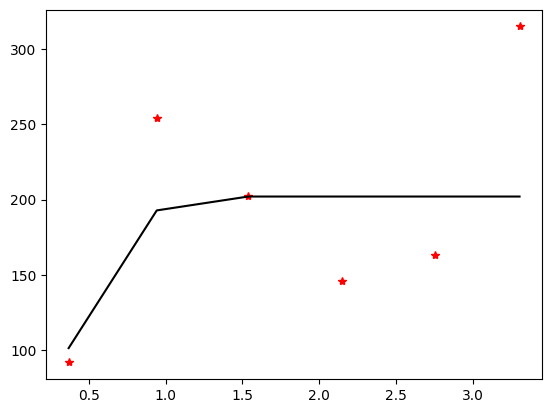

Calculating statistics on variogram model fit...


In [13]:
from pykrige.ok import OrdinaryKriging
variogram_model = "spherical"
coordinates_type = "geographic"
OK = OrdinaryKriging(
    x,
    y,
    gz,
    variogram_model=variogram_model,
    verbose=True,
    coordinates_type=coordinates_type,
    enable_plotting=True,
)



In [14]:
OK.variogram_model_parameters

array([187.40913417,   1.15971223,  14.61644559])

In [15]:
zstar, ss = OK.execute("grid", grid_x, grid_y)

Executing Ordinary Kriging...



In [16]:
print(zstar.shape)
print(ss.shape)

(50, 50)
(50, 50)


Text(0.5, 1.0, 'Porosity estimate')

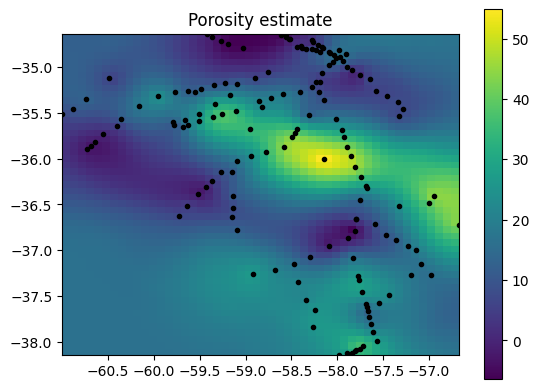

In [17]:
cax = plt.imshow(zstar, extent=(
    min(x), max(x), min(y), max(y)), origin='lower')
plt.scatter(x, y, c='k', marker='.')
cbar = plt.colorbar(cax)
plt.title('Porosity estimate')


Text(0.5, 1.0, 'Porosity standard devation')

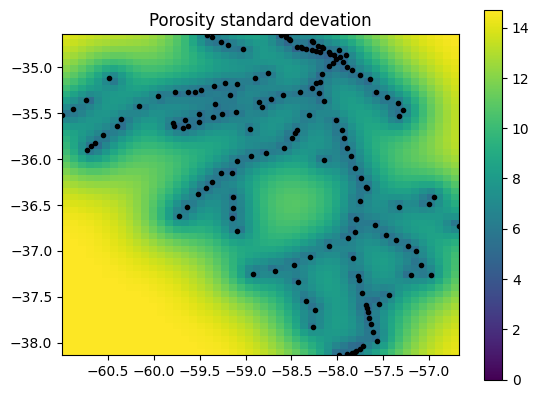

In [18]:
cax = plt.imshow(np.sqrt(ss), extent=(
    min(x), max(x), min(y), max(y)),
    origin='lower', vmin=0)
plt.scatter(x, y, c='k', marker='.')
cbar = plt.colorbar(cax)
plt.title('Porosity standard devation')


In [19]:
OK.variogram_model_parameters

array([187.40913417,   1.15971223,  14.61644559])